In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from math import exp, log10
sns.set()
# Scipy Optimization Algorithm is used to find the optimal parameters
import scipy.optimize as opt
# Scipy is needed to load a MATLAB digit dataset
from scipy.io import loadmat
from IPython.display import Image, display

## 1 Regularized Linear Regression
In the rst half of the exercise, you will implement regularized linear regres-
sion to predict the amount of water 
owing out of a dam using the change
of water level in a reservoir. In the next half, you will go through some diag-
nostics of debugging learning algorithms and examine the eects of bias v.s.
variance.

We will begin by visualizing the dataset containing historical records on the
change in the water level, x, and the amount of water 
owing out of the dam,
y.
This dataset is divided into three parts:

• A training set that your model will learn on: X, y

• A cross validation set for determining the regularization parameter:
Xval, yval

• A test set for evaluating performance. These are \unseen" examples
which your model did not see during training: Xtest, ytest

In [64]:
data = loadmat('ex5data1')

In [65]:
dataX = pd.DataFrame.from_dict(data['X'])
dataXtest = pd.DataFrame.from_dict(data['Xtest'])
dataXval = pd.DataFrame.from_dict(data['Xval'])

dataY = pd.DataFrame.from_dict(data['y'])
dataYtest = pd.DataFrame.from_dict(data['ytest'])
dataYval = pd.DataFrame.from_dict(data['yval'])

In [66]:
# Constract the X any Y matrix arrays
X = np.array([np.ones(len(dataX)),dataX[0]]).T
Xtest = np.array([np.ones(len(dataXtest)),dataXtest[0]]).T
Xval = np.array([np.ones(len(dataXval)),dataXval[0]]).T

Y = np.array(dataY[0])
Ytest = np.array(dataYtest[0])
Yval = np.array(dataYval[0])

print('X matrix shape is ', X.shape, '\nXtest matrix shape is', Xtest.shape,'\nXval matrix shape is', Xval.shape)
print('Y matrix shape is ', Y.shape, '\nYtest matrix shape is', Ytest.shape,'\nYval matrix shape is', Yval.shape)

X matrix shape is  (12, 2) 
Xtest matrix shape is (21, 2) 
Xval matrix shape is (21, 2)
Y matrix shape is  (12,) 
Ytest matrix shape is (21,) 
Yval matrix shape is (21,)


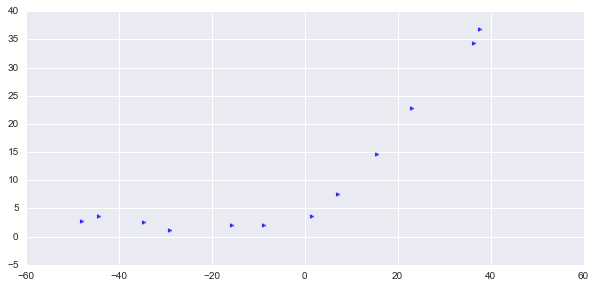

In [67]:
#Visualization Training Set
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
sns.regplot(x=X[:,1], y=Y, color="b", fit_reg=False, marker='4', ax=ax1)

In [68]:
# Cost Function for Regularization
regul_param=0
#l = len(Y)
def cost_reg(T,X,Y,regul_param):
    y_reg = np.matmul(X,T)
    error = y_reg - Y
    c = (error**2).sum()
    c = c * 1/(2*len(Y))
    
    #Regularization parameter
    c_reg=(T**2).sum()
    c_reg=c_reg*(regul_param/(2*len(Y)))
    
    cost_regul = c+c_reg
    return (cost_regul)

In [69]:
#Gradient Function, with Regularization
def grad_reg(T,X,Y,regul_param):
    y_reg = np.matmul(X,T)
    error = y_reg - Y
    g = np.matmul(error,X)/len(Y)
    
    #Regularization part
    g_reg=regul_param/len(Y)*(T)
    g_reg[0]=0
    
    grad_regul = g + g_reg
    return grad_regul

In [70]:
T = np.array([1,1])

In [71]:
print('Cost of the funciton is: ',cost_reg(T,X,Y,regul_param))
print('Gradient of the funciton is: ',grad_reg(T,X,Y,regul_param))

Cost of the funciton is:  303.951525554
Gradient of the funciton is:  [ -15.30301567  598.16741084]


In [72]:
theta, theta_i = opt.fmin_bfgs(cost_reg,x0=T,fprime=grad_reg,args=(X, Y, regul_param),retall = 1, disp = 0)
print(theta)

[ 13.08790351   0.36777923]


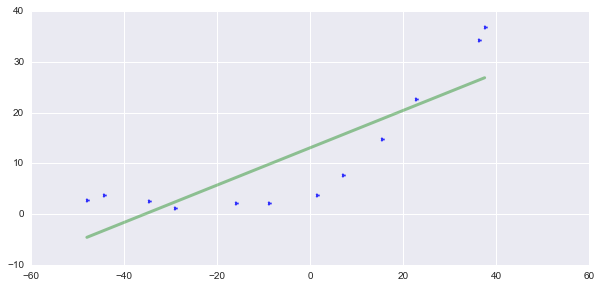

In [73]:
#Visualization Training Set
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
sns.regplot(x=X[:,1], y=Y, color="b", fit_reg=False, marker='4', ax=ax1)

plt.plot([X.min(),X.max()], [X.min()*theta[1]+theta[0], X.max()*theta[1]+theta[0]], 'k-', lw=3, color='green', alpha=0.4)

# Other way of line plot
#a=np.array([np.ones(100),np.linspace(X.min(),X.max(),100)]).T
#b=np.matmul(a,theta)
#sns.regplot(x=a[:,1], y=b, color="b", fit_reg=False, ax=ax1)

## 2 Bias-variance
An important concept in machine learning is the bias-variance tradeo. Mod-
els with high bias are not complex enough for the data and tend to undert,
while models with high variance overt to the training data.

In this part of the exercise, We will plot training and test errors on a
learning curve to diagnose bias-variance problems.

You will now implement code to generate the learning curves that will be
useful in debugging learning algorithms. Recall that a learning curve plots
training and cross validation error as a function of training set size.

In [74]:
def bivar_plot():
    train=[]
    crval=[]
    size = []
    T = np.array([1,1])
    n=3
    for i in range (n,len(Y)):
        x = X[:i,:]
        y = Y[:i]
        theta, theta_i = opt.fmin_bfgs(cost_reg,x0=T,fprime=grad_reg,args=(x, y, regul_param),retall = 1, disp = 0)
        crval.append(cost_reg(theta,Xval,Yval,regul_param))
        train.append(cost_reg(theta,x,y,regul_param))
        size.append(i)
    return([size,train,crval])


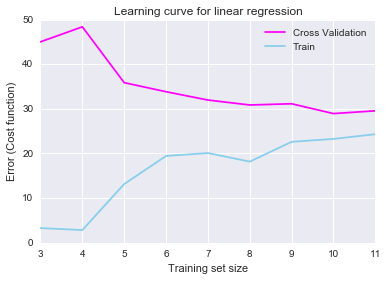

In [75]:
bivar = bivar_plot()
plt.plot( bivar[0], bivar[2], color='magenta', label='Cross Validation')
plt.plot( bivar[0], bivar[1], color='skyblue', label='Train')
plt.ylabel('Error (Cost function)')
plt.xlabel('Training set size')
plt.title('Learning curve for linear regression')
plt.legend()
plt.show()

In Figure above, you can observe that both the train error and cross validation
error are high when the number of training examples is increased. This
reects a high bias problem in the model. The linear regression model is too simple and is unable to our dataset well. In the next section, we will implement polynomial regression to a better model for this dataset.

## Polynomial regression
The problem with our linear model was that it was too simple for the data
and resulted in undertting (high bias). In this part of the exercise, you will
address this problem by adding more features.

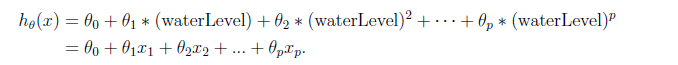

In [76]:
display(Image(filename='regul_reg1.PNG', embed=True, width=800))

In [77]:
# Create a function for extra feature X^2
n=8  #degree of the polinomial
def feat(x,n):
    for i in range(2,n+1):
        x = np.column_stack((x,x[:,1]**i))
    return x

X_feat=feat(X,n)
def normal(x):
    for i in range (1,len(x[0])):
        x[:,i] = (x[:,i] - x[:,i].mean())/x[:,i].std()
    return x

#Function to convert Validation set Features to normalized. A matrix should contain ones('1') column
def val(a,x):
    #a=feat(a,n)
    for i in range (1,len(a[0])):
        a[:,i] = (a[:,i] - x[:,i].mean())/x[:,i].std()
    return a

#Lets Make only one Function for Construct a new Feature Matrix

Xfeat=normal(X_feat)       
Xfeat[:,0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [78]:
T = np.ones(n+1)

In [79]:
regul_param=0
theta, theta_i = opt.fmin_bfgs(cost_reg,x0=T,fprime=grad_reg,args=(Xfeat, Y, regul_param),retall = 1, disp = 0)
print(theta)

[ 11.21758931   9.11134328  18.14286886  29.12096443 -27.02518425
 -74.98718548   6.2738997   61.10961811  21.03526471]


In [80]:
X_feat=feat(X,n)
a = np.linspace(X.min(),X.max(),100)
a1 = np.column_stack([np.ones(100),a])
a1 = val(a1,X_feat)

In [81]:
a1.shape

(100, 2)

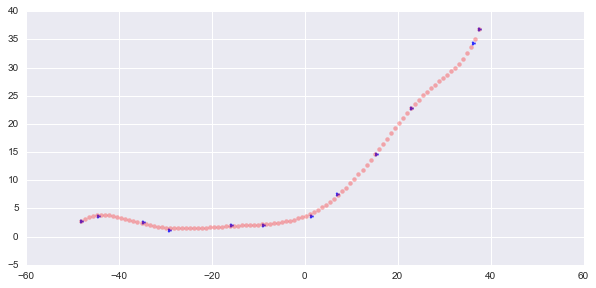

In [82]:
#Visualization Training Set
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
#show the set values
sns.regplot(x=X[:,1], y=Y, color="b", fit_reg=False, marker='4', ax=ax1)
X_feat=feat(X,n)
a = np.linspace(X.min(),X.max(),100)
a1 = np.column_stack([np.ones(100),a])
a1=feat(a1,n)
a1 = val(a1,X_feat)
b = np.matmul(a1,theta)
# Show the predicted values
sns.regplot(x=a, y=b, color="r", fit_reg=False, ax=ax1, scatter_kws={'alpha':0.3})

### Note about Normalozation

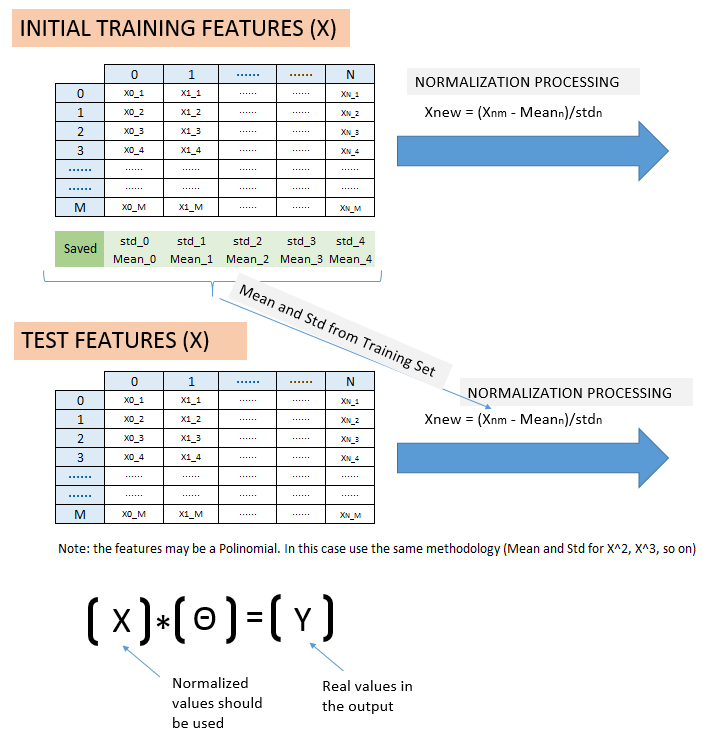

In [83]:
display(Image(filename='regul_reg2.PNG', embed=True, width=700))

In [84]:
print('Cost of the funciton is: ',cost_reg(theta,Xfeat,Y,regul_param))
#print('Gradient of the funciton is: ',grad_reg(theta,Xfeat,Y,regul_param))

Cost of the funciton is:  0.0288940478104


In [85]:
#val(feat(Xval,n),X_feat)
#val(feat(Xval,n), X_feat)
#len(X_feat[0])

In [86]:
#Function to plot Bias and Variance
def bivar_plot_1(lamb):
    train=[]
    crval=[]
    size = []
    T = np.ones(n+1)
    Xv = val(feat(Xval,n), X_feat)
    for i in range (3,len(Y)):
        x = Xfeat[:i,:]
        y = Y[:i]
        theta, theta_i = opt.fmin_bfgs(cost_reg,x0=T,fprime=grad_reg,args=(x, y, lamb),retall = 1, disp = 0)
        crval.append(cost_reg(theta,Xv,Yval,lamb))
        train.append(cost_reg(theta,x,y,lamb))
        size.append(i)
    bivar=[size,train,crval]
    plt.plot( bivar[0], bivar[2], color='magenta', label='Cross Validation')
    plt.plot( bivar[0], bivar[1], color='skyblue', label='Train')
    plt.ylabel('Error (Cost function)')
    plt.xlabel('Training set size')
    title = 'Learning curve for linear regression with lambda = ' + str(lamb)
    plt.title(title)
    plt.legend()
    plt.show()
    return
# ([size,train,crval])

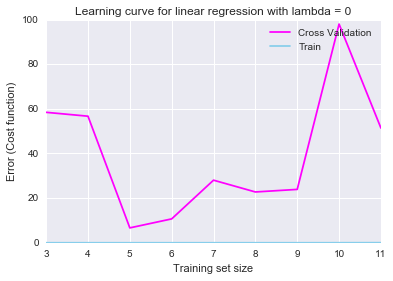

In [87]:
bivar = bivar_plot_1(0)

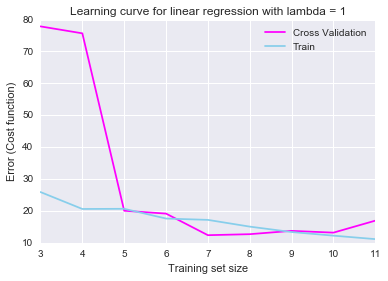

In [88]:
bivar = bivar_plot_1(1)

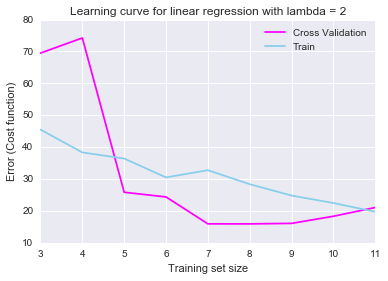

In [89]:
bivar = bivar_plot_1(2)

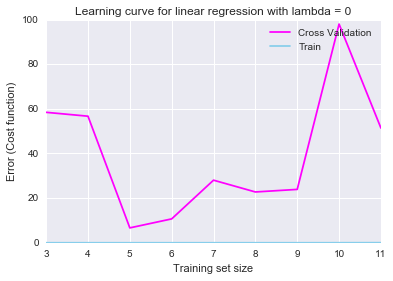

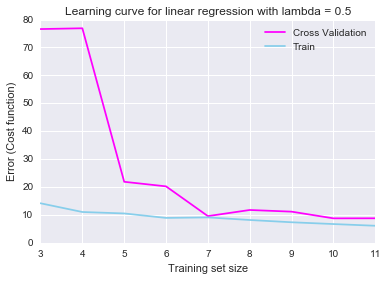

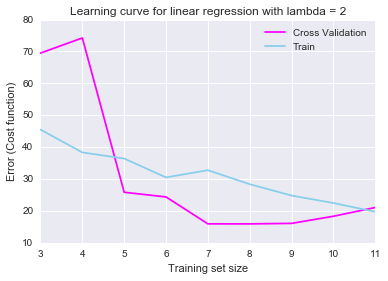

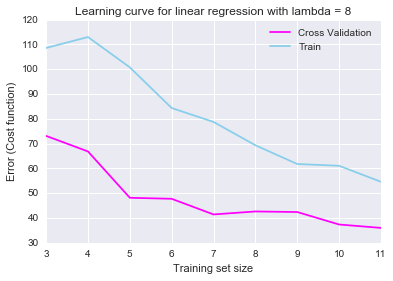

In [90]:
#fig = plt.figure()
bivar_plot_1(0)
bivar_plot_1(0.5)
bivar_plot_1(2)
bivar_plot_1(8)